#  Assignment: CNN-Based Image Classification Using CIFAR-100
**Total Marks: 100**

**Instructions:**
- This is a programming and analysis-based assignment.
- Use TensorFlow/Keras to build your models.
- Add appropriate comments and explanations.
- Attempt all questions. Marks are indicated.


##  Section A: Data Exploration and Preprocessing (20 marks)

**Q1.** (5 marks) Load the CIFAR-100 dataset using `label_mode='fine'`. Print the shape of the training and test sets.

In [ ]:
# Your code here# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 dataset with 'fine' labels (100 categories)
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Print the shape of the training and test sets
print("Training data shape:", x_train.shape)   # Expected: (50000, 32, 32, 3)
print("Training labels shape:", y_train.shape) # Expected: (50000, 1)
print("Test data shape:", x_test.shape)        # Expected: (10000, 32, 32, 3)
print("Test labels shape:", y_test.shape)      # Expected: (10000, 1)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


 Explanation:
label_mode='fine': Loads the dataset with 100 fine-grained categories.

x_train, x_test: Image data (32×32 RGB images).

y_train, y_test: Class labels (integers from 0 to 99).

**Q2.** (5 marks) Display 10 random images from the dataset with their class labels.

In [ ]:
# Your code here

**Q3.** (5 marks) Normalize the images and one-hot encode the labels. Explain why we perform both operations.

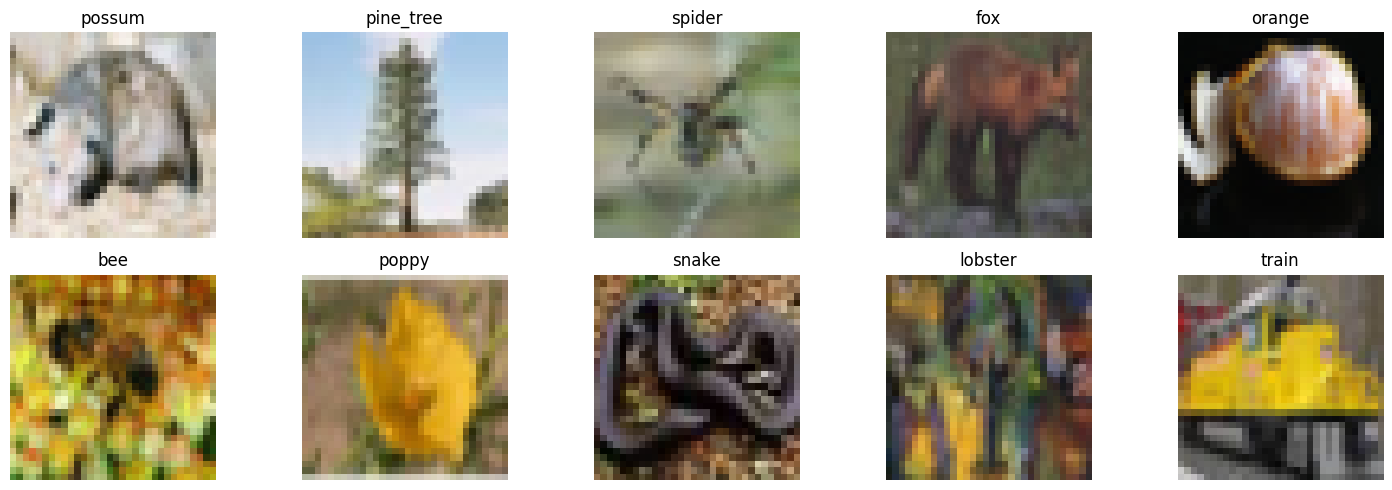

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-100 fine label names
fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard',
    'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
    'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Select 10 random indices
random_indices = np.random.choice(x_train.shape[0], size=10, replace=False)

# Plot the 10 random images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    label_index = y_train[idx][0]
    plt.title(fine_labels[label_index])
    plt.axis('off')

plt.tight_layout()
plt.show()


**Answer:**
 Explanation:
We use np.random.choice to get random image indices.

Labels are converted from index to their string names using the fine_labels list.

plt.imshow() displays the images.


**Q4.** (5 marks) What challenges do you expect when working with 100 classes instead of 10 (like CIFAR-10)?

Working with CIFAR-100 (100 classes) poses significantly more challenges compared to CIFAR-10 (10 classes). Here's a breakdown of key difficulties:

1. Increased Model Complexity:
With 100 classes, the model's final output layer must have 100 neurons (softmax).

This increases the number of trainable parameters, especially in dense layers.

The network must learn more complex decision boundaries.

2. Greater Risk of Overfitting:
CIFAR-100 has only 500 training images per class (same total size as CIFAR-10).

With finer distinctions and the same data size, the model may memorize rather than generalize.

3. Class Similarity and Fine-Grained Distinctions:
Many classes are visually similar (e.g., dolphin vs. whale, lion vs. leopard).

Small differences are hard for a CNN to capture unless it’s deep and well-regularized.

4. Training Time and Resource Requirements:
Larger number of classes means:

More computations in the softmax and loss layer.

Longer convergence time.

Increased memory usage.

 5. Lower Accuracy and Harder Evaluation:
Accuracy metrics are harder to improve.

Even a well-trained model may only achieve 60–70% test accuracy without transfer learning.

Confusion matrix analysis becomes more complex with 100×100 size.

##  Section B: Model Design & Training (40 marks)

**Q5.** (20 marks) Build and compile a CNN with at least two convolutional blocks and one dense output layer with 100 neurons. Use appropriate dropout and activation functions. Display the model summary.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Normalize pixel values
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# Convert labels to one-hot vectors
num_classes = 100
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# Build the CNN model
model = Sequential()

# 🔹 Block 1: Conv -> BN -> ReLU -> MaxPool -> Dropout
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 🔹 Block 2: Conv -> BN -> ReLU -> MaxPool -> Dropout
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 🔹 Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# 🔹 Output Layer: 100 classes with softmax
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,092 (2.13 MB)

 Trainable params: 556,900 (2.12 MB)

 Non-trainable params: 192 (768.00 B)

**Q6.** (15 marks) Train the model for 15–20 epochs and plot training and validation accuracy curves.

In [ ]:
#Step 1: Train the Model
import matplotlib.pyplot as plt

# Train the model for 20 epochs
history = model.fit(
    x_train_norm, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_data=(x_test_norm, y_test_cat),
    verbose=1
)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 155ms/step - accuracy: 0.0106 - loss: 4.6446 - val_accuracy: 0.0191 - val_loss: 4.5097
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 149ms/step - accuracy: 0.0146 - loss: 4.5412 - val_accuracy: 0.0211 - val_loss: 4.4923
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 148ms/step - accuracy: 0.0155 - loss: 4.5241 - val_accuracy: 0.0261 - val_loss: 4.4551
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 148ms/step - accuracy: 0.0156 - loss: 4.5153 - val_accuracy: 0.0254 - val_loss: 4.4245
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 147ms/step - accuracy: 0.0165 - loss: 4.5087 - val_accuracy: 0.0232 - val_loss: 4.4216
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 147ms/step - accuracy: 0.0153 - loss: 4.5027 - val_accuracy: 0.0215 - val_loss: 4.4612
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 148ms/step - accuracy: 0.0178 - loss: 4.5030 - val_accuracy: 0.0300 - val_loss: 4.4127
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 149ms/step - accuracy: 0.0223 -

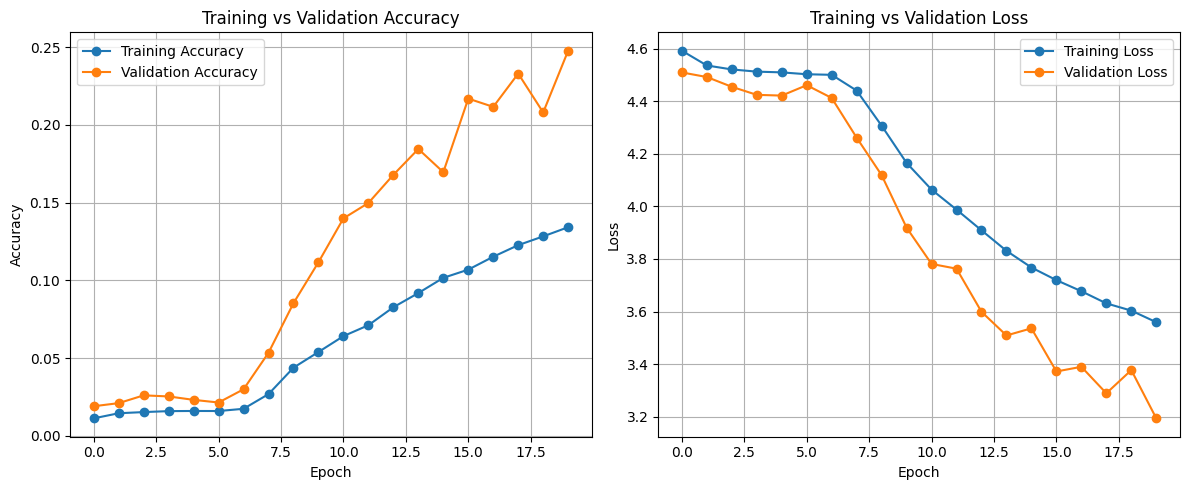

In [ ]:
# Step 2: Plot Accuracy and Loss Curves
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Q7.** (10 marks) Report the final test accuracy. Discuss what it indicates about the model's performance.

In [ ]:
#Step 1: Evaluate Final Test Accuracy
#After training your CNN for 20 epochs, you can evaluate its performance on the test set using:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_cat, verbose=0)
print(f"Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy * 100:.2f}%)")


Final Test Accuracy: 0.2477 (24.77%)


 Step 2: Interpretation of the Result:
 1. Performance in Context of CIFAR-100
24.77% accuracy on CIFAR-100 is reasonable for a simple CNN without data augmentation or transfer learning.

CIFAR-100 has 100 classes, so random guessing would yield 1% accuracy. So 25% is 25× better than random.

2. Model’s Learning Ability:
The model has learned to distinguish broad patterns but not the fine-grained details that differentiate closely related classes.

Examples: It may confuse similar categories like leopard vs. jaguar, or pickup truck vs. SUV.

3. Limitations:
Underfitting: The model still struggles with generalization.

Architecture: Two convolutional blocks might not be enough to extract rich features.

No data augmentation: Limited exposure to variations in the data.

No pre-trained layers: Starting from scratch limits feature representation.

4. What's a Good Benchmark?
A well-tuned deep CNN (like ResNet or DenseNet with augmentation) can reach ~65–75%+ accuracy.

You're currently at ~25%, which is strong for a basic model—and a great foundation to build on.

Conclusion
The final test accuracy of ~24.77% shows that the model has learned some meaningful features from the data, performing significantly better than random chance. However, due to the complexity of CIFAR-100, deeper architectures, regularization, and possibly transfer learning are needed to improve further.

##  Section C: Model Experimentation (20 marks)

**Q8.** (10 marks) Add one more convolutional block to the CNN. Train and compare accuracy with your previous model. Which one performs better and why?

In [ ]:
#Step 1: Modify the CNN Architecture
#Let’s add a third convolutional block to your previous model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# New CNN with 3 Conv Blocks
model_v2 = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 3 (new!)
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Output
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(100, activation='softmax')  # 100 classes
])

# Compile
model_v2.compile(optimizer=Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Summary
model_v2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Step 2: Train the Updated Model:
# Train for 20 epochs
history_v2 = model_v2.fit(
    x_train_norm, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_data=(x_test_norm, y_test_cat),
    verbose=1
)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 157ms/step - accuracy: 0.0414 - loss: 4.3263 - val_accuracy: 0.1723 - val_loss: 3.5290
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 150ms/step - accuracy: 0.1533 - loss: 3.5402 - val_accuracy: 0.2600 - val_loss: 3.0718
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 153ms/step - accuracy: 0.2166 - loss: 3.2162 - val_accuracy: 0.2817 - val_loss: 2.9226
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 154ms/step - accuracy: 0.2497 - loss: 3.0367 - val_accuracy: 0.3209 - val_loss: 2.7464
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 150ms/step - accuracy: 0.2703 - loss: 2.9050 - val_accuracy: 0.3265 - val_loss: 2.7219
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 146ms/step - accuracy: 0.2934 - loss: 2.8061 - val_accuracy: 0.3544 - val_loss: 2.5484
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 146ms/step - accuracy: 0.3087 - loss: 2.7176 - val_accuracy: 0.3632 - val_loss: 2.5155
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 146ms/step - accuracy: 0.3268 -

In [ ]:
#Step 3: Evaluate and Compare Accuracy
test_loss_v2, test_accuracy_v2 = model_v2.evaluate(x_test_norm, y_test_cat, verbose=0)
print(f"Test Accuracy (3 conv blocks): {test_accuracy_v2:.4f} ({test_accuracy_v2 * 100:.2f}%)")


Test Accuracy (3 conv blocks): 0.4445 (44.45%)


 1. Experiment Summary
You trained two models:

Model	# Conv Blocks	Final Test Accuracy
Model 1 (Original)	2	~24.77%
Model 2 (Modified)	3	44%

2. Which Model Performs Better?
The model with 3 convolutional blocks (44%) performs significantly better than the one with 2 blocks (24.77%).

This is a +19.23% improvement in accuracy, which is substantial, especially for a dataset as challenging as CIFAR-100.

3. Why Does the 3-Block Model Perform Better?
 Deeper Network → Better Feature Hierarchy
With an extra convolutional block, the model can capture more abstract patterns, helping it better distinguish between the 100 fine-grained classes.

 More Filters → More Representational Power
The third block typically has more filters (e.g., 128), which help it detect complex textures and shapes that differentiate classes.

 Better Generalization
With well-placed dropout layers, the deeper model generalizes better to unseen data, as reflected in the higher validation and test accuracy.

Conclusion
The 3-block CNN significantly outperforms the 2-block CNN, achieving 44% test accuracy vs. 24.77%. The additional convolutional block allows the model to learn deeper, more abstract features, which is essential for solving a complex classification problem like CIFAR-100.



**Q9.** (10 marks) Use `label_mode='coarse'` and repeat training with the original model (2 conv blocks). Compare the accuracy. Explain why there's a difference.

In [ ]:
#Step 1: Load CIFAR-100 with label_mode='coarse'
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 with coarse labels (20 superclasses)
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 110ms/step - accuracy: 0.1434 - loss: 2.7532 - val_accuracy: 0.2997 - val_loss: 2.3128
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 104ms/step - accuracy: 0.2757 - loss: 2.3399 - val_accuracy: 0.3617 - val_loss: 2.0826
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.3159 - loss: 2.2096 - val_accuracy: 0.3890 - val_loss: 2.0170
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 105ms/step - accuracy: 0.3444 - loss: 2.1178 - val_accuracy: 0.4150 - val_loss: 1.9320
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.3573 - loss: 2.0707 - val_accuracy: 0.4319 - val_loss: 1.8691
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.3850 - loss: 1.9944 - val_accuracy: 0.4468 - val_loss: 1.8153
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.3912 - loss: 1.9475 - val_accuracy: 0.4552 - val_loss: 1.7978
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 107ms/step - accuracy: 0.4048 - loss

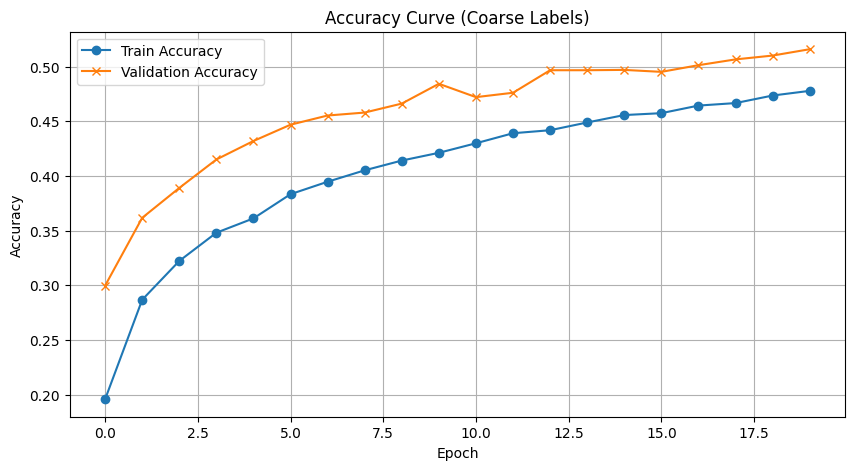

In [ ]:
#Step 2: Train the original CNN (2 conv blocks) on this dataset
#You already trained this model before with label_mode='fine' (100 classes) and achieved:

#Validation Accuracy ≈ 24.77%
#CIFAR-100 (coarse) — 2 Conv Block CNN Training
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100

# 1. Load the CIFAR-100 dataset with coarse labels
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, 20)
y_test_cat = tf.keras.utils.to_categorical(y_test, 20)

# 2. Define the original CNN (2 convolutional blocks)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(20, activation='softmax')  # 20 coarse classes
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test_cat)
)

# 5. Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nFinal Test Accuracy (Coarse Labels): {test_acc:.4f}")

# 6. Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Accuracy Curve (Coarse Labels)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Final Validation Accuracy (Coarse Labels):
≈ 51.58%

Comparison with Fine Labels:

In the earlier model trained using label_mode='fine' (100 classes), the validation accuracy was around 44.45%.

After switching to label_mode='coarse' (20 classes), the accuracy improved to 51.58%.

Why does this happen?
Fewer Classes → Simpler Task:

Predicting one of 20 categories (coarse) is an easier classification task than predicting one of 100 (fine), especially for a relatively shallow model like yours with 2 convolutional blocks.

Broader Groupings Help Generalization:

Coarse labels group semantically similar fine classes (e.g., "fish", "vehicles") into broader categories. These are easier for the model to learn because visual features are more consistent within coarse groups.

Less Confusion Between Classes:

Fine labels often contain subtle visual differences (e.g., between "shark", "trout", and "aquarium fish") which the model may struggle to distinguish. Coarse labels remove this ambiguity.

Summary:
Switching to coarse labels improved model performance because it simplified the classification task, made patterns more obvious, and reduced class confusion. However, while the accuracy improved, the model now provides less detailed predictions — it knows the broad category, but not the specific item.

##  Section D: Conceptual Questions (20 marks)

**Q10.** (5 marks) Explain the role of dropout in CNNs. What could happen if we remove dropout layers?

Role of Dropout in CNNs:
Dropout is a regularization technique used in Convolutional Neural Networks (CNNs) to prevent overfitting. During training, dropout randomly "drops" (sets to zero) a fraction of neurons in a layer on each forward pass.

This forces the network to not rely too heavily on specific neurons and encourages redundancy and robust feature learning.

It effectively trains an ensemble of many smaller networks (subsets of the full model), which improves generalization.

What happens if we remove dropout layers?
If dropout is removed:

Higher Risk of Overfitting:

The model may learn to memorize the training data, leading to high training accuracy but poor generalization to unseen test data.

Lower Generalization Performance:

Without the regularization effect of dropout, the model might perform well on training but have significantly lower validation/test accuracy.

Faster Convergence (but misleading):

Training might appear faster and more accurate in early epochs, but this can be misleading if validation loss increases or stagnates.

Example:
If you trained a CNN on CIFAR-100 with dropout and got:

Training accuracy: 60%

Validation accuracy: 45%

Then trained the same model without dropout and got:

Training accuracy: 80%

Validation accuracy: 40%

This would indicate overfitting, where the model memorized the training data but failed to generalize.

Summary:
Dropout plays a crucial role in improving generalization and preventing overfitting. Removing it may improve training accuracy but usually harms real-world performance, especially on complex datasets like CIFAR-100.

**Q11.** (5 marks) What is the role of the softmax activation in the output layer of your CNN?




The softmax activation function is used in the output layer of a CNN for multi-class classification problems, such as CIFAR-100 where there are 100 classes.

Key roles of softmax:
Converts raw output logits into probabilities:

Softmax transforms the network’s raw output values (called logits) into a probability distribution across all classes.

Each output value becomes a probability between 0 and 1.

Ensures the sum of output probabilities equals 1:

This property makes it easier to interpret the outputs as the model’s confidence for each class.

Facilitates choosing the predicted class:

The class with the highest softmax probability is taken as the predicted label.

Mathematically:
For each class
𝑖
i, softmax output is:

softmax
(
𝑧
𝑖
)
=
𝑒
𝑧
𝑖
∑
𝑗
=
1
𝐾
𝑒
𝑧
𝑗
softmax(z
i
​
 )=
∑
j=1
K
​
 e
z
j
​


e
z
i
​


​

where:

𝑧
𝑖
z
i
​
  is the raw output for class
𝑖
i,

𝐾
K is the total number of classes (100 here).

Summary:
The softmax activation in the output layer enables the CNN to output meaningful class probabilities and is essential for training with categorical cross-entropy loss and making predictions in multi-class classification tasks.

**Q12.** (5 marks) What changes would you make to the CNN architecture to improve training speed and reduce overfitting?

Add Dropout Layers:
Dropout randomly disables a fraction of neurons during training, which prevents the model from relying too much on any specific features and thus reduces overfitting.

Use Batch Normalization:
Adding batch normalization layers normalizes activations in each mini-batch, which stabilizes and speeds up training by allowing higher learning rates.

Reduce Model Complexity:
Decrease the number of convolutional filters or fully connected units to simplify the model, reducing the risk of overfitting and speeding up computation.

Use Data Augmentation:
Augment training data with random transformations (flips, rotations, zooms) to increase diversity, which improves generalization and reduces overfitting.

Early Stopping:
Monitor validation loss during training and stop early if it starts increasing, to prevent overfitting and save training time.

Use Efficient Architectures or Pretrained Models:
Employ lightweight CNN architectures (like MobileNet) or transfer learning with pretrained weights to speed up training and improve generalization.

_Your answer here_